# E-mail Spam Detection

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("C:\\Users\\divi\\Downloads\\mail_data.csv")

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape

(5572, 2)

In [9]:
# data cleaning
# EDA
# Text preprocessing
# Model building
# Improvment
# Website
# deploy

# 1.Data Cleaning


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.sample(3)

,Category,Message
2130,ham,Mine here like all fr china then so noisy.
3268,ham,Ok then i come n pick u at engin?
3488,ham,Change windows logoff sound..


In [13]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [14]:
df['Category']=encoder.fit_transform(df['Category'])

In [15]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#missing values

df.isnull().sum()

Category    0
Message     0
dtype: int64

In [17]:
#check the duplicate values

df.duplicated().sum()

415

In [20]:
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5157, 2)

# 2.EDA

In [23]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

([<matplotlib.patches.Wedge at 0x2075bc19550>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57'),
  Text(0.5548334056198901, -0.22838540235364085, '12.43')])

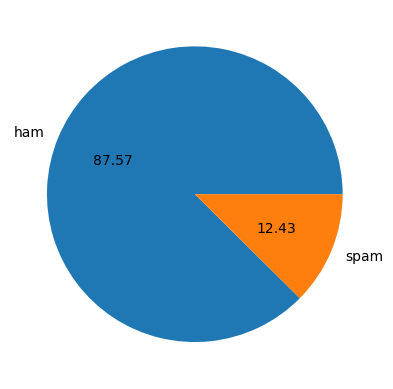

In [26]:
import matplotlib.pyplot as plt

plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [27]:
#data is imbalanced

In [28]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
df['num_characters']=df["Message"].apply(len)

In [40]:
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: num_characters, Length: 5157, dtype: int64

In [41]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [43]:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [44]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [45]:
df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [46]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [54]:
#ham
df[df['Category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [55]:
#spam
df[df['Category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [56]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

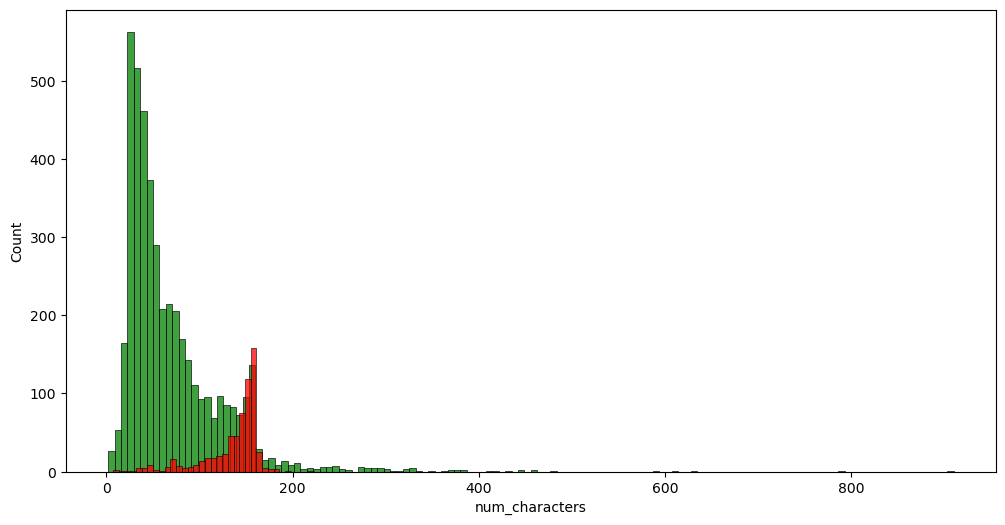

In [67]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['num_characters'],color='green')
sns.histplot(df[df['Category']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

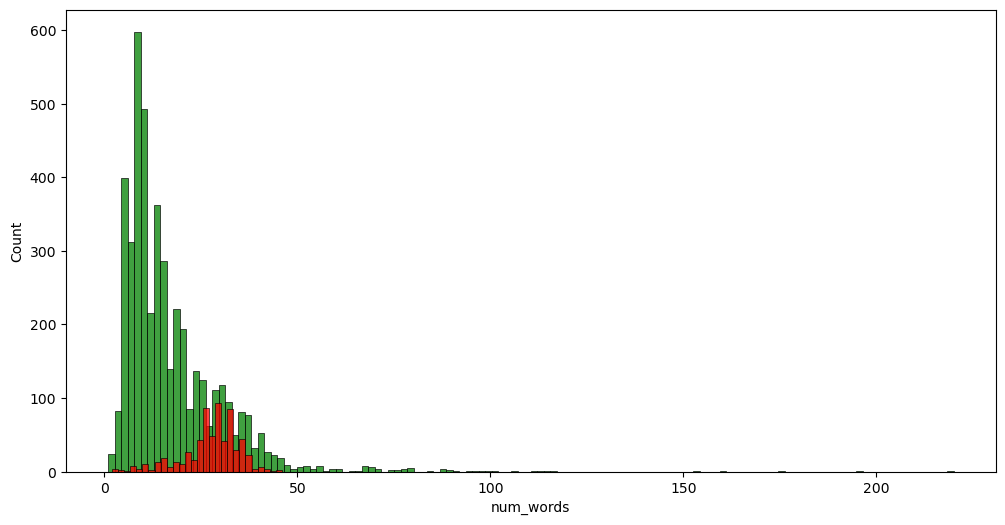

In [68]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['num_words'],color='green')
sns.histplot(df[df['Category']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

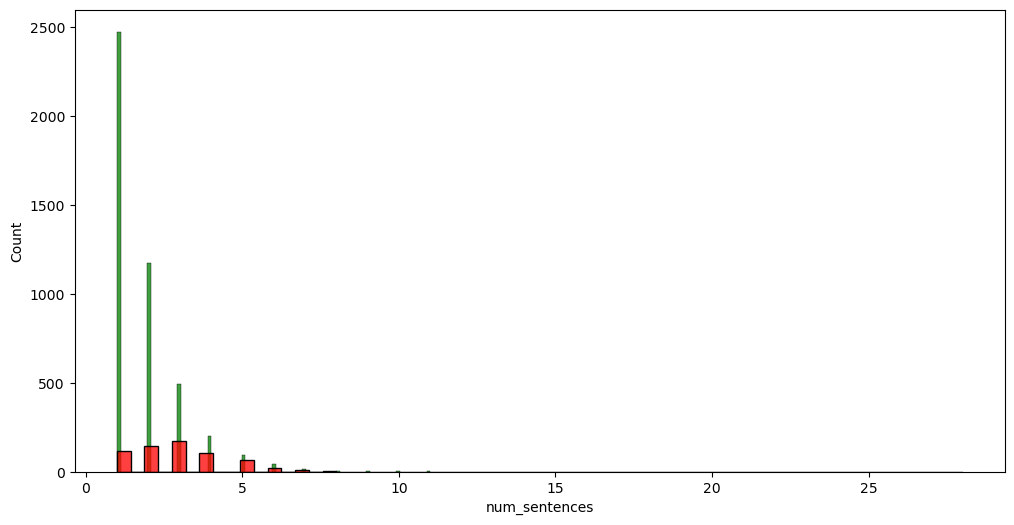

In [70]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['num_sentences'],color='green')
sns.histplot(df[df['Category']==1]['num_sentences'],color='red')

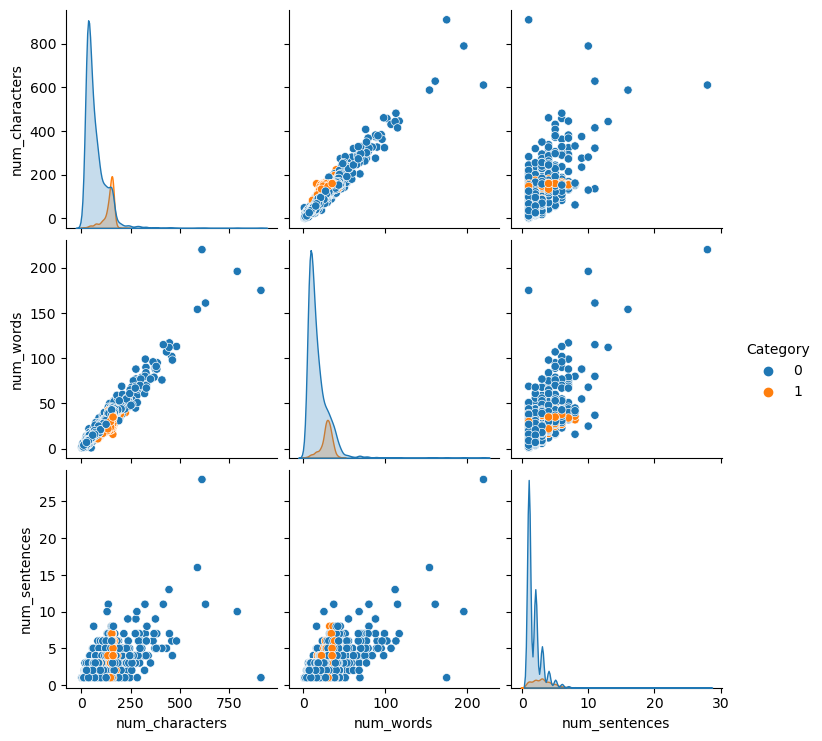

In [71]:
sns.pairplot(df,hue='Category')

<AxesSubplot:>

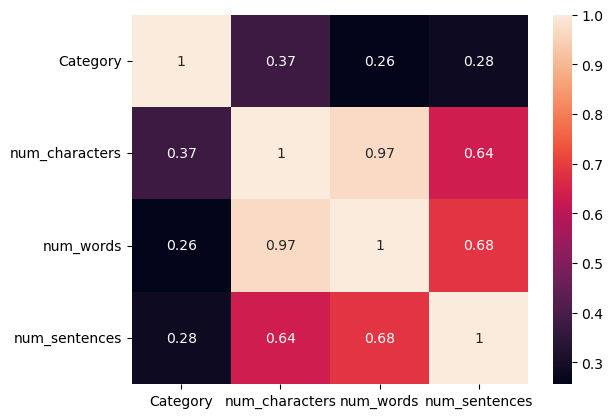

In [77]:
sns.heatmap(df.corr(),annot=True)

In [194]:
df.drop(columns=['text'],inplace=True)

In [195]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point,, crazy.., avail, bugi, n, ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar..., joke, wif, u, oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor..., u, c, alreadi, sa..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf,, live, around, though]"


In [196]:
df.rename(columns={'Message':'text'},inplace=True)

In [197]:
df.head()

,Category,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point,, crazy.., avail, bugi, n, ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar..., joke, wif, u, oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor..., u, c, alreadi, sa..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf,, live, around, though]"


# 3.data preprocessing

*lower case
*tokenization
*Removing special characters
*Removing stop words and punction
*stemming

In [248]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
            
    text=y[:]
    y.clear()
    for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
                
            text=y[:]
            y.clear()
            
            for i in text:
                y.append(ps.stem(i))
            
    return " ".join(y)

In [249]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [250]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [257]:
transform_text(" i want to present a gift for my friend birthday give any idea,'Todays Voda numbers ending 7548 are selected to receive a $350 award. If you have a match please call 08712300220 quoting claim code 4041 standard rates app'")

'want present gift friend birthday give idea voda number end 7548 select receiv 350 award match plea call 08712300220 quot claim code 4041 standard rate app'

In [258]:
df['text'][123]

'Todays Voda numbers ending 7548 are selected to receive a $350 award. If you have a match please call 08712300220 quoting claim code 4041 standard rates app'

In [259]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
print(ps.stem('loving'))


love


In [260]:
df['text'].apply(transform_text)


0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth el next...
5571                                       rofl true name
Name: text, Length: 5157, dtype: object

In [262]:
df.head()

,Category,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point,, crazy.., avail, bugi, n, ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar..., joke, wif, u, oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor..., u, c, alreadi, sa..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf,, live, around, though]"


In [269]:
from wordcloud import WordCloud

wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [270]:
import pandas as pd

# Assuming 'transform_text' is the column you're working with
df['transform_text'] = df['transform_text'].astype(str)

# Now you can use .str.cat without encountering the TypeError
spam_wc = wc.generate(df[df['Category'] == 1]['transform_text'].str.cat(sep=""))


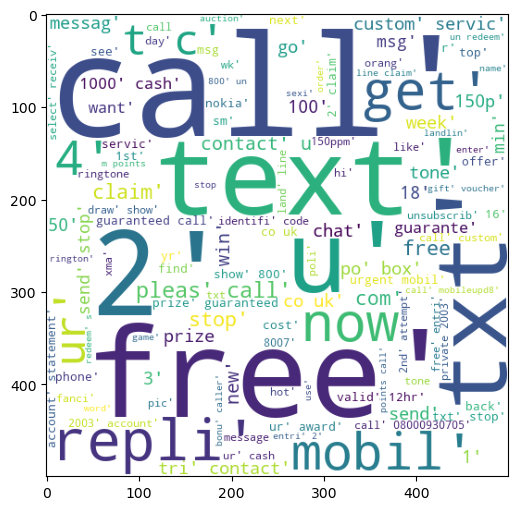

In [272]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [274]:
ham_wc = wc.generate(df[df['Category'] == 0]['transform_text'].str.cat(sep=""))

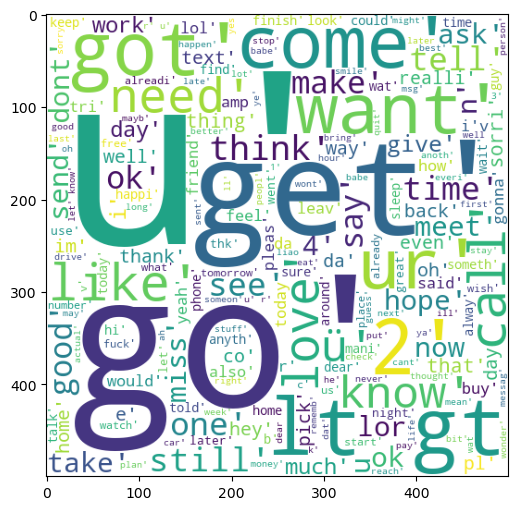

In [275]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [276]:
df.head()

,Category,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point,', 'crazy..', 'avail',..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar...', 'joke', 'wif', 'u', 'oni...']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'earli', 'hor...', 'u', 'c..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goe', 'usf,', 'live', 'aroun..."


In [288]:
spam_corpus=[]
for msg in df[df['Category'] == 1]['transform_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [289]:
len(spam_corpus)

10866

C:\Users\divi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, "'call',"),
  Text(1, 0, "'2',"),
  Text(2, 0, "'free',"),
  Text(3, 0, "'txt',"),
  Text(4, 0, "'text',"),
  Text(5, 0, "'ur',"),
  Text(6, 0, "'repli',"),
  Text(7, 0, "'mobil',"),
  Text(8, 0, "'claim',"),
  Text(9, 0, "'u',"),
  Text(10, 0, "'4',"),
  Text(11, 0, "'stop',"),
  Text(12, 0, "'get',"),
  Text(13, 0, "'new',"),
  Text(14, 0, "'send',"),
  Text(15, 0, "'nokia',"),
  Text(16, 0, "'servic',"),
  Text(17, 0, "'prize',"),
  Text(18, 0, "'contact',"),
  Text(19, 0, "'tone',"),
  Text(20, 0, "'cash',"),
  Text(21, 0, "'now!',"),
  Text(22, 0, "'pleas',"),
  Text(23, 0, "'phone',"),
  Text(24, 0, "'win',"),
  Text(25, 0, "'award',"),
  Text(26, 0, "'per',"),
  Text(27, 0, "['urgent!',"),
  Text(28, 0, "'number',"),
  Text(29, 0, "'week',")])

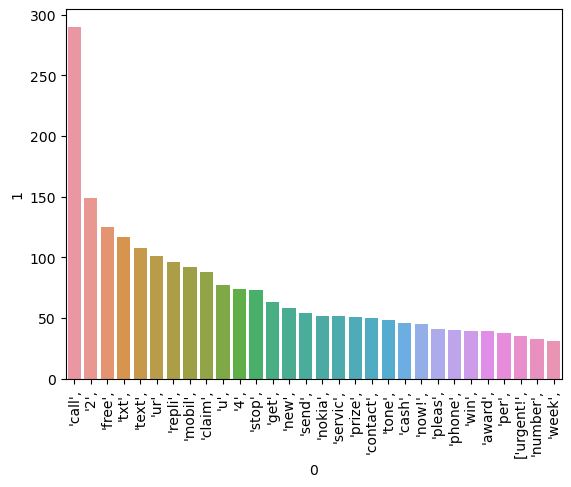

In [291]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [292]:
ham_corpus=[]
for msg in df[df['Category'] == 0]['transform_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [293]:
len(ham_corpus)

38678

C:\Users\divi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, "'u',"),
  Text(1, 0, "'go',"),
  Text(2, 0, "'get',"),
  Text(3, 0, "'2',"),
  Text(4, 0, '"i\'m",'),
  Text(5, 0, "'come',"),
  Text(6, 0, "'&lt;#&gt;',"),
  Text(7, 0, "'like',"),
  Text(8, 0, "'ur',"),
  Text(9, 0, "'got',"),
  Text(10, 0, "'call',"),
  Text(11, 0, "'want',"),
  Text(12, 0, "'know',"),
  Text(13, 0, "'4',"),
  Text(14, 0, "'love',"),
  Text(15, 0, "'time',"),
  Text(16, 0, "'need',"),
  Text(17, 0, "'...',"),
  Text(18, 0, "'good',"),
  Text(19, 0, "'one',"),
  Text(20, 0, "'still',"),
  Text(21, 0, '"i\'ll",'),
  Text(22, 0, "'n',"),
  Text(23, 0, "'see',"),
  Text(24, 0, "'take',"),
  Text(25, 0, "'make',"),
  Text(26, 0, "'ü',"),
  Text(27, 0, '["i\'m",'),
  Text(28, 0, "'think',"),
  Text(29, 0, "'tell',")])

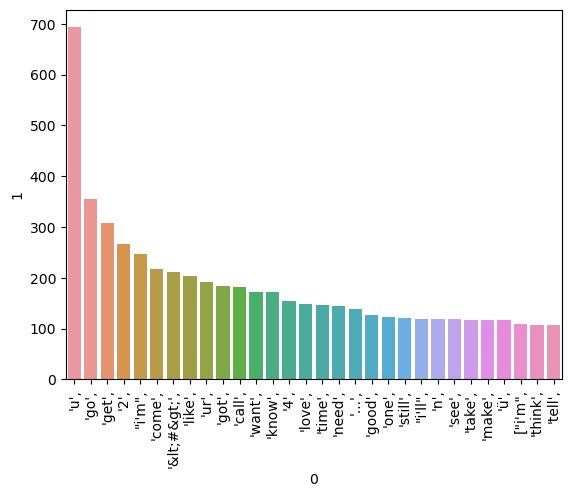

In [294]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [296]:
df.head(3)

,Category,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point,', 'crazy..', 'avail',..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar...', 'joke', 'wif', 'u', 'oni...']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."


# 4.model building

In [323]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer()

In [324]:
x=tfidf.fit_transform(df['transform_text']).toarray()

In [325]:
x.shape

(5157, 8248)

In [326]:
y=df['Category'].values

In [327]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [330]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [331]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [332]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8846899224806202
[[806  99]
 [ 20 107]]
0.5194174757281553


In [333]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9641472868217055
[[905   0]
 [ 37  90]]
1.0


In [334]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748062015503876
[[901   4]
 [ 22 105]]
0.963302752293578


In [335]:
df.head()

,Category,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point,', 'crazy..', 'avail',..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar...', 'joke', 'wif', 'u', 'oni...']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'earli', 'hor...', 'u', 'c..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goe', 'usf,', 'live', 'aroun..."


In [339]:
df.loc[df['Category']=='spam','Category',]=0
df.loc[df['text']=='ham','Category',]==1

Series([], Name: Category, dtype: bool)

In [340]:
x=df['text']

y=df['Category']

In [341]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5157, dtype: object


In [342]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32


In [346]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [347]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5157,)
(4125,)
(1032,)


In [348]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5157,)
(4125,)
(1032,)


In [354]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

x_train_feature=feature_extraction.fit_transform(x_train)
x_test_feature=feature_extraction.transform(x_test)

y_train=y_train.astype('str')
y_test=y_test.astype('str')

In [355]:
print(x_train)

1786                   I dun believe u. I thk u told him.
3576    And do you have any one that can teach me how ...
420     Send a logo 2 ur lover - 2 names joined by a h...
5156    Sir, I need Velusamy sir's date of birth and c...
3354    I emailed yifeng my part oredi.. Can ü get it ...
                              ...                        
809          I am taking half day leave bec i am not well
993     Up to ü... Ü wan come then come lor... But i d...
1726    You know there is. I shall speak to you in  &l...
3525    Yeah that'd pretty much be the best case scenario
1748                     I think u have the wrong number.
Name: text, Length: 4125, dtype: object


In [357]:
print(x_train_feature)

  (0, 6692)	0.48303813512243965
  (0, 6605)	0.4898673616987752
  (0, 1247)	0.5538832733861689
  (0, 2400)	0.4689535663823655
  (1, 1592)	0.5594126567616489
  (1, 5859)	0.5964494866231046
  (1, 6492)	0.5755914257195885
  (2, 300)	0.16113294658934302
  (2, 820)	0.24488128414489752
  (2, 6835)	0.24488128414489752
  (2, 5064)	0.22967525805125708
  (2, 7355)	0.21568440262445418
  (2, 682)	0.22967525805125708
  (2, 25)	0.24488128414489752
  (2, 2564)	0.19505111090227498
  (2, 798)	0.24488128414489752
  (2, 4393)	0.24488128414489752
  (2, 4520)	0.24488128414489752
  (2, 4519)	0.24488128414489752
  (2, 4084)	0.2644704778405301
  (2, 6828)	0.13848562282513652
  (2, 3252)	0.18176623831152225
  (2, 3695)	0.21568440262445418
  (2, 4522)	0.2363176943466334
  (2, 4089)	0.2196593047164816
  :	:
  (4120, 1223)	0.5846719438819551
  (4120, 6456)	0.4751891362657192
  (4120, 3181)	0.4285103741434733
  (4120, 3921)	0.39220487670240334
  (4120, 2101)	0.30807173962343376
  (4121, 5968)	0.4786671802830861
  (

In [359]:
from sklearn.linear_model import LogisticRegression

In [360]:
model=LogisticRegression()

In [364]:
model.fit(x_train_feature,y_train)

LogisticRegression()

In [365]:
prediction_on_training_data=model.predict(x_train_feature)

accuracy_on_training_data=accuracy_score(y_train,prediction_on_training_data)

In [367]:
print("acc on training data :",accuracy_on_training_data)

acc on training data : 0.961939393939394


In [369]:
prediction_on_test_data=model.predict(x_test_feature)

accuracy_on_test_data=accuracy_score(y_test,prediction_on_test_data)

In [370]:
print("acc on training data :",accuracy_on_test_data)

acc on training data : 0.9544573643410853


In [377]:
email=[' I am taking half day leave bec i am not well']

input_data_features=feature_extraction.transform(email)

prediction=model.predict(input_data_features)

print(prediction)


if(prediction[0]==1):
    print("ham mail")
else:
    print("spam  mail")
    

['0']
spam  mail
